# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
from math import floor
import ast
import json
import re
import numpy as np

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "pvc_args_metrics_"

In [3]:
def get_workload(code):
    with open(path+"/"+code+"/queries.config",'r') as inp:
        workload_properties = ast.literal_eval(inp.read())
        return workload_properties


def get_performance_single(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    return df

def get_performance(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    result = df.groupby('client').agg({
        'Goodput (requests/second)': 'sum',
        'num_errors': 'sum',
        'Latency Distribution.Average Latency (microseconds)': 'mean',
        'Latency Distribution.99th Percentile Latency (microseconds)': 'max',
    }).reset_index()
    return result

def get_performance_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_performance_all_single(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance_single(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_metrics(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            for m, metric in c['monitoring']['metrics'].items():
                if m in result:
                    continue
                result[m] = {
                    'title': metric['title'],
                    'active': metric['active'] if 'active' in metric else 'True',
                    'type': metric['type'] if 'type' in metric else 'cluster',
                    'metric': metric['metric'] if 'metric' in metric else '',
                }
            #result[c['name']] = {
            #    'metrics': c['monitoring']['metrics'],
            #}
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            #print(c)
            result[c['name']] = {
                'time_load': c['timeLoad'],
                'time_ingest': c['timeIngesting'],
                'time_check': c['timeIndex'],
                'terminals': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS'],
                #'target': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TARGET'],
                'pods': c['parameter']['parallelism'],
                'tenant': c['parameter']['TENANT'] if 'TENANT' in c['parameter'] else '',
                'client': c['parameter']['client'],
                'datadisk': c['hostsystem']['datadisk'],
            }
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_loading_time_max(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def show_summary_monitoring_table(evaluate, component):
    df_metrics = get_metrics(evaluate) # not used by now
    #print(df_metrics)
    df_monitoring = list()
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util_s', component=component)
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    #df = df.T.max().sort_index() - df.T.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU [CPUs]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max CPU"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df).round(2)
    df_cleaned.columns = ["Max RAM [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory_cached', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max RAM Cached [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Locks"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_active', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Active"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction_aborted', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Aborted"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Hits"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Reads"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Reads"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Hits"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_sync_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Sync Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_write_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Write Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='cache_hit_ratio', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Cache Hit Ratio [%]"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autoanalyze_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autoanalyze"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_user_tables_autovacuum_count', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Number Autovacuum"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    return df_monitoring


def get_monitoring_timeseries_single(code, metric='pg_locks_count', component="stream"):
    evaluate = evaluators.benchbase(code=code, path=path)
    df = evaluate.get_monitoring_metric(metric=metric, component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    #df = df.mean().sort_index()
    #df_cleaned = pd.DataFrame(df)
    #df_cleaned.columns = ["Locks"]
    return df#_cleaned


def get_monitoring_stream_single(evaluation):
    df_monitoring = show_summary_monitoring_table(evaluation, "stream")
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        return df

def get_monitoring(evaluation, type="stream"):
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        result = df.groupby('client').agg({
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'Locks': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Heap Hits': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Number Autoanalyze': 'sum',
            'Number Autovacuum': 'sum',
            'Cache Hit Ratio [%]': 'mean',
        }).reset_index()
        return result

def get_monitoring_stream(evaluation):
    return get_monitoring(evaluation, type="stream")

def get_monitoring_all(codes, type="stream"):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_monitoring(evaluation, type)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_monitoring_stream_all(codes):
    return get_monitoring_all(codes, type="stream")


In [4]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [5]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [6]:
codes = [
    # container
    '1752572699', #tenants=9
    #'1752464472', #tenants=10

    # database
    '1752568918', #tenants=9
    #'1752464472', #tenants=10

    #schema
    '1752565302', #tenants=9
    #'1752537927', #tenants=10

]

codes

['1752572699', '1752568918', '1752565302']

<Axes: >

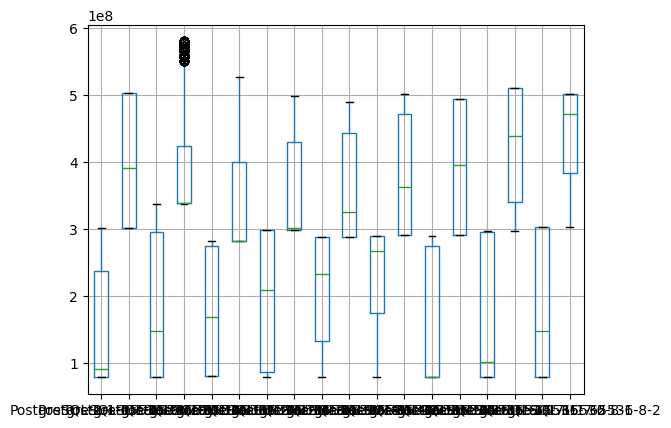

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

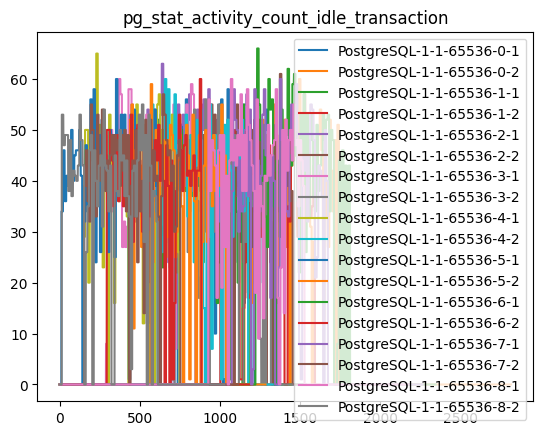

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,35478.10,73.48,109.63,60.60,3902.65,228.05,10.78,143.81,0.0,...,288.0,131.0,1.049215e+09,0.0,0.0,109100.0,88200.0,100.0,container,9
1,2,35482.21,80.35,123.16,62.54,4187.24,255.91,11.54,149.48,0.0,...,74.0,74.0,9.960372e+08,0.0,0.0,100700.0,81000.0,100.0,container,9
0,1,10325.02,29.98,51.50,30.58,60256.40,6631.10,26.71,387.52,0.0,...,530.0,53.0,2.204529e+08,0.0,0.0,83900.0,70900.0,100.0,database,9
1,2,12667.68,34.37,58.27,28.71,56785.56,6478.18,21.51,348.12,0.0,...,240.0,24.0,2.674580e+08,0.0,0.0,78600.0,63200.0,100.0,database,9
0,1,10979.05,30.17,51.74,26.55,5776.45,654.64,1.38,35.37,0.0,...,98.0,84.0,2.502046e+08,0.0,0.0,75800.0,66100.0,100.0,schema,9
1,2,13270.70,37.07,63.64,32.33,5773.48,641.85,7.61,47.04,1.0,...,27.0,27.0,3.130845e+08,0.0,0.0,67000.0,58700.0,100.0,schema,9


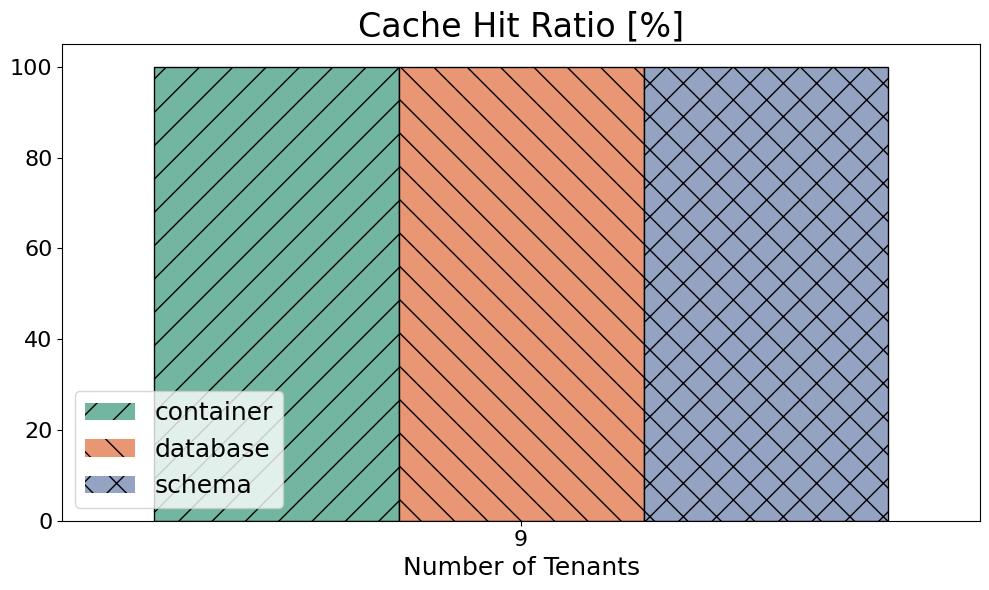

In [10]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

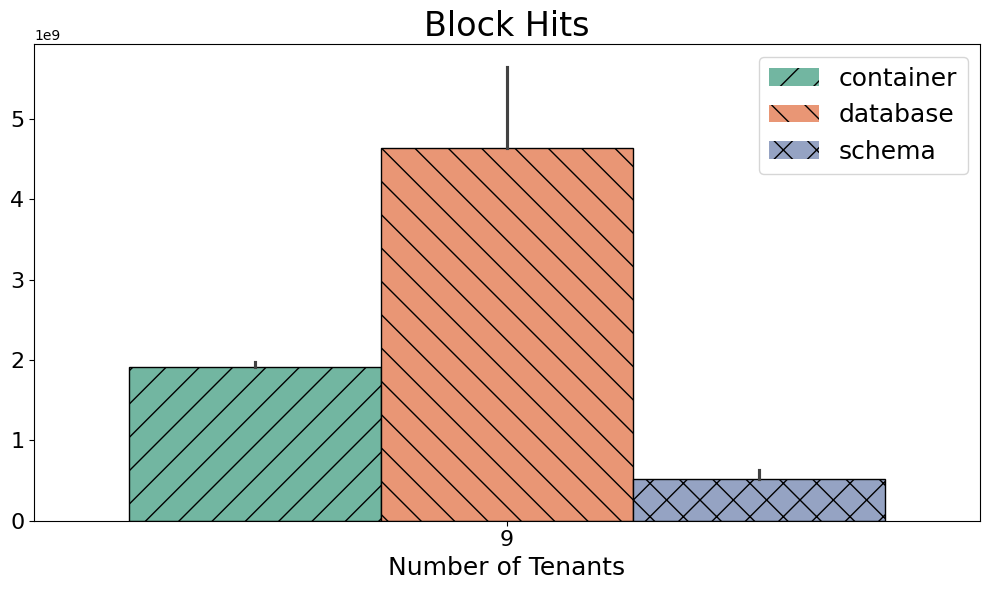

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

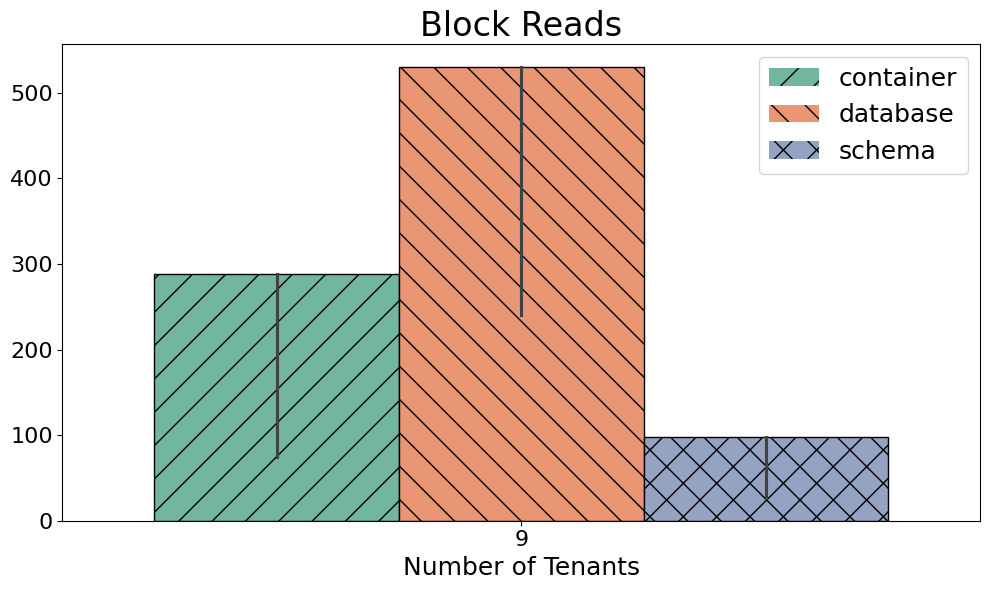

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

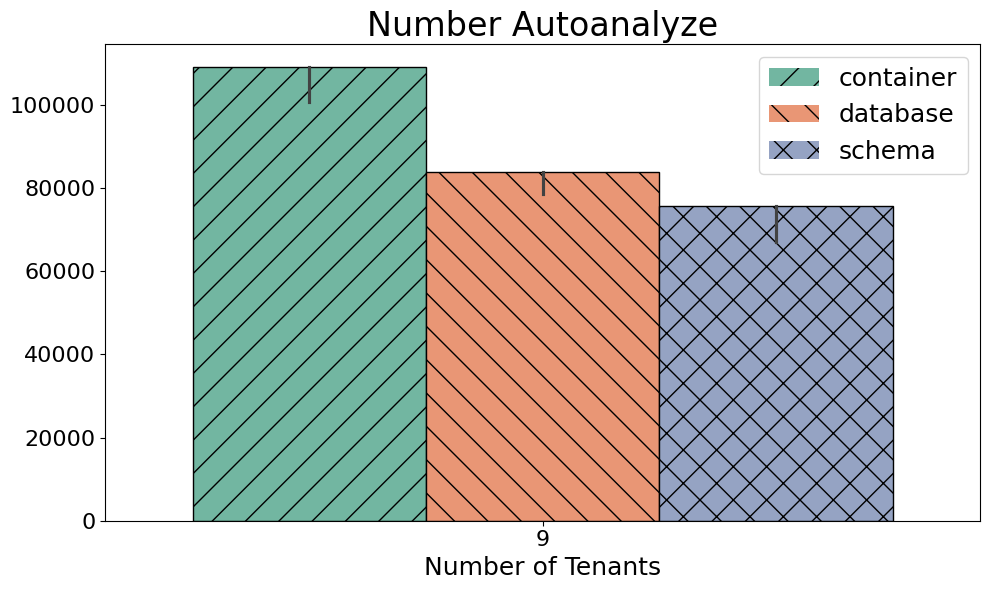

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

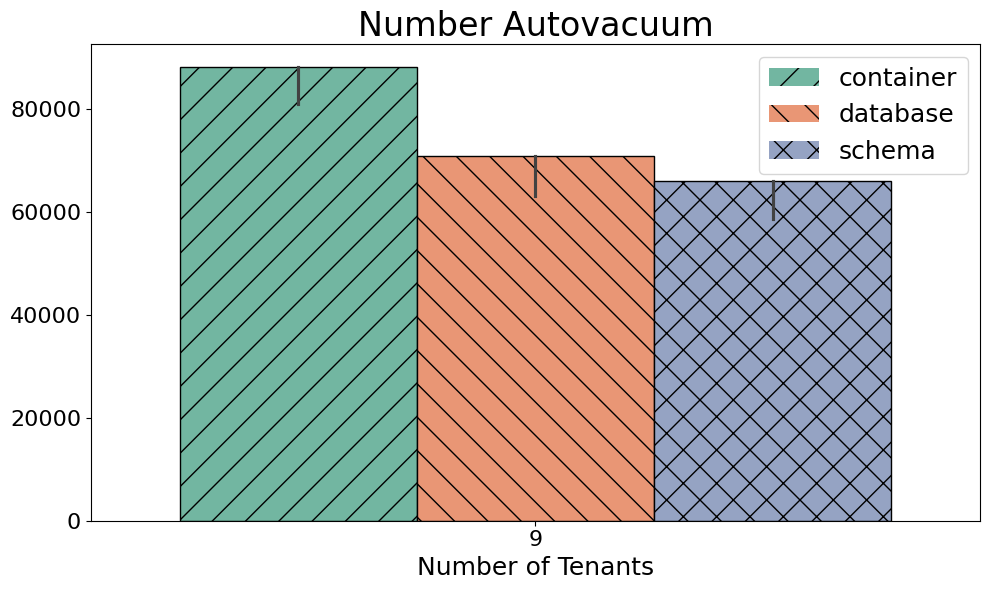

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

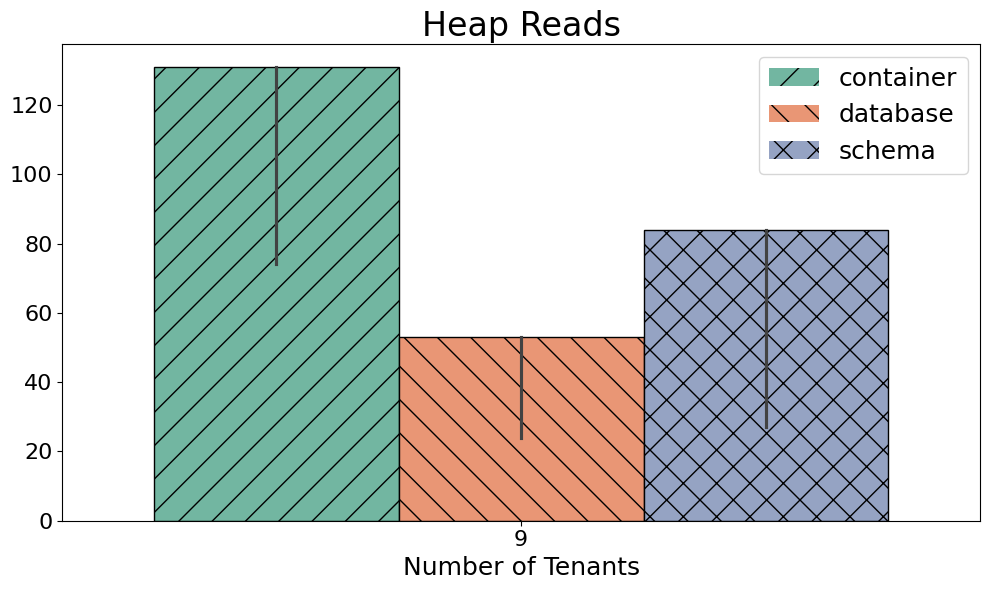

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

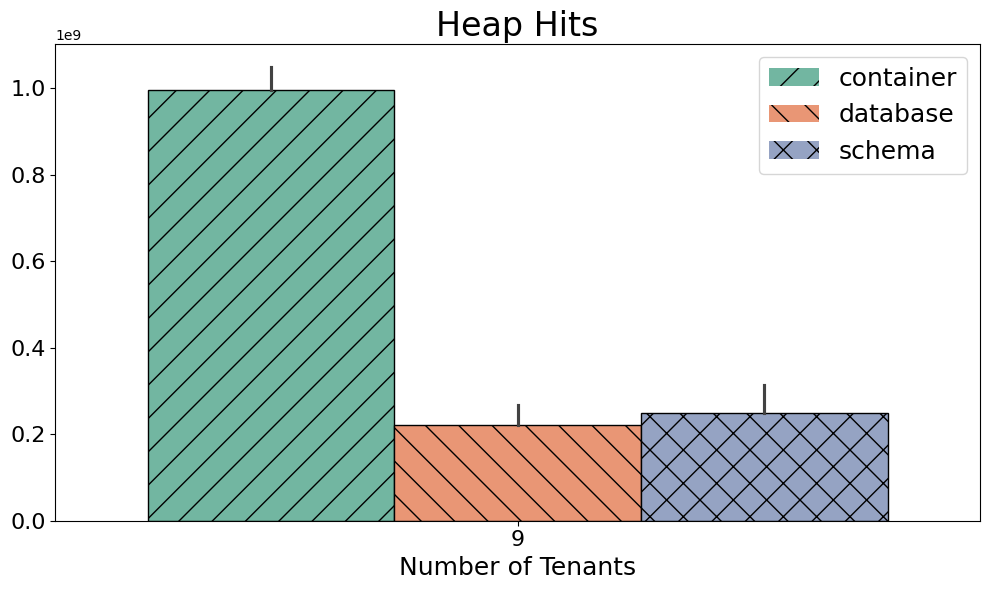

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

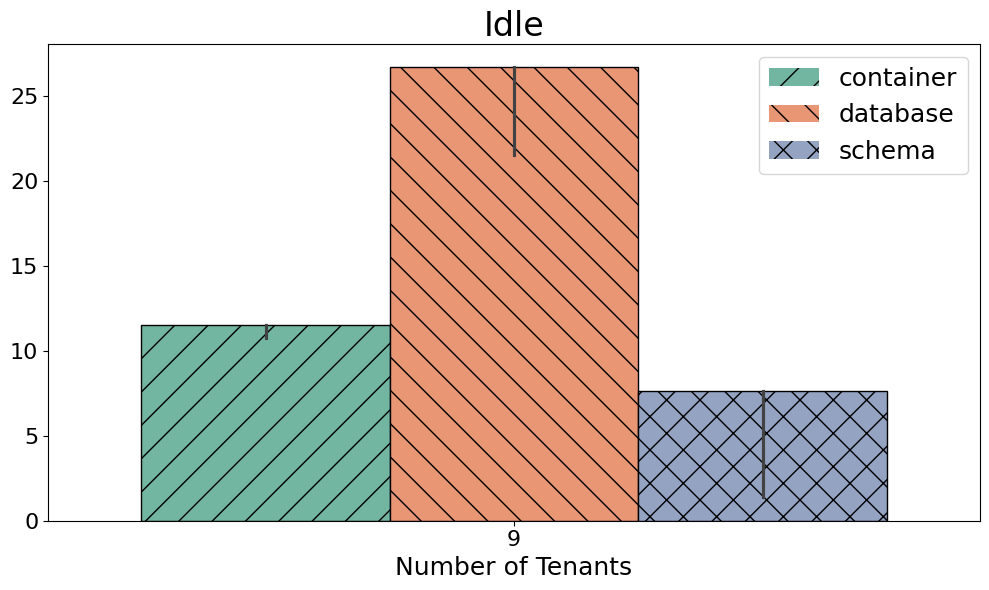

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

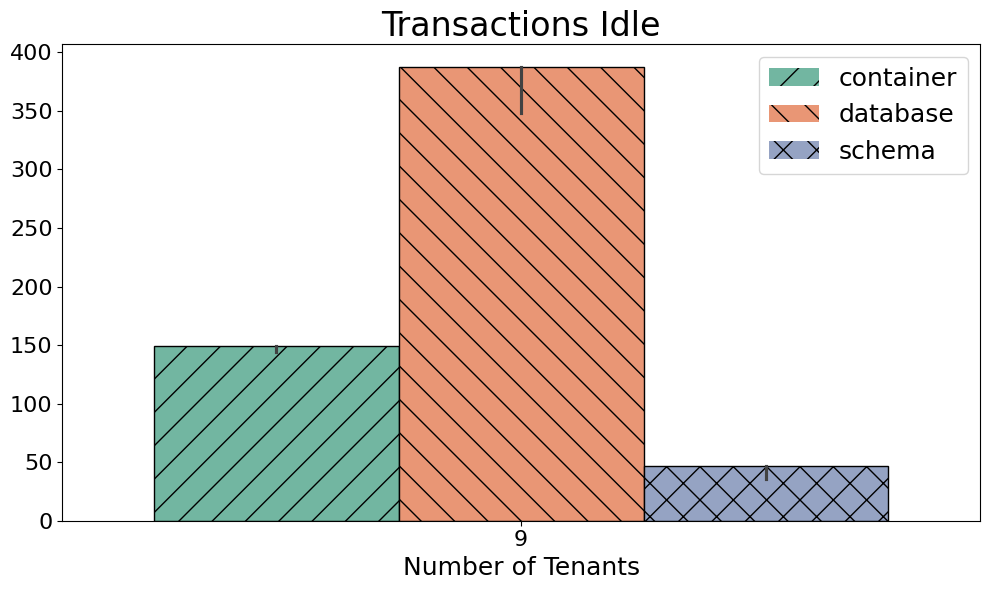

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

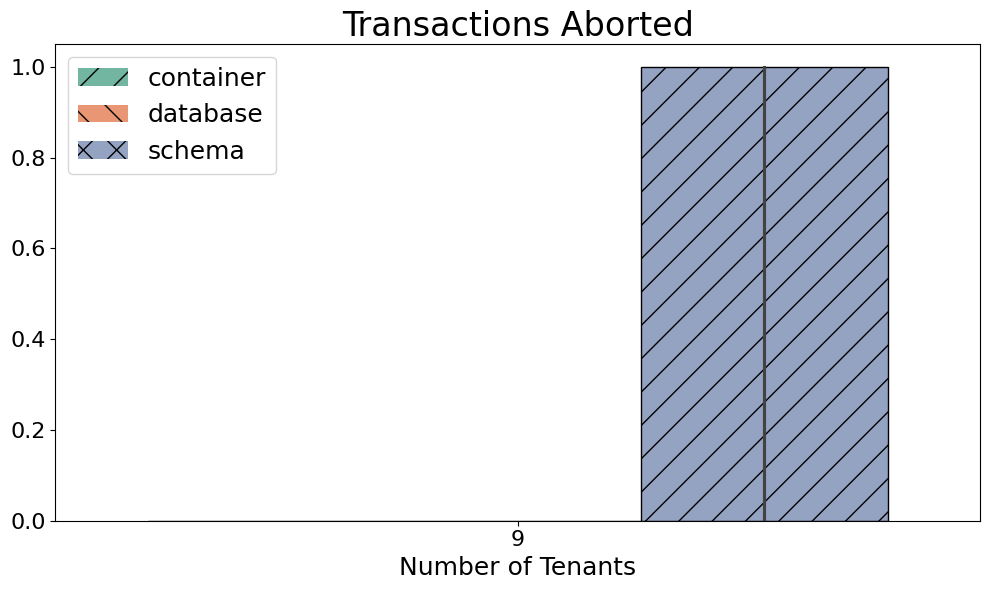

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

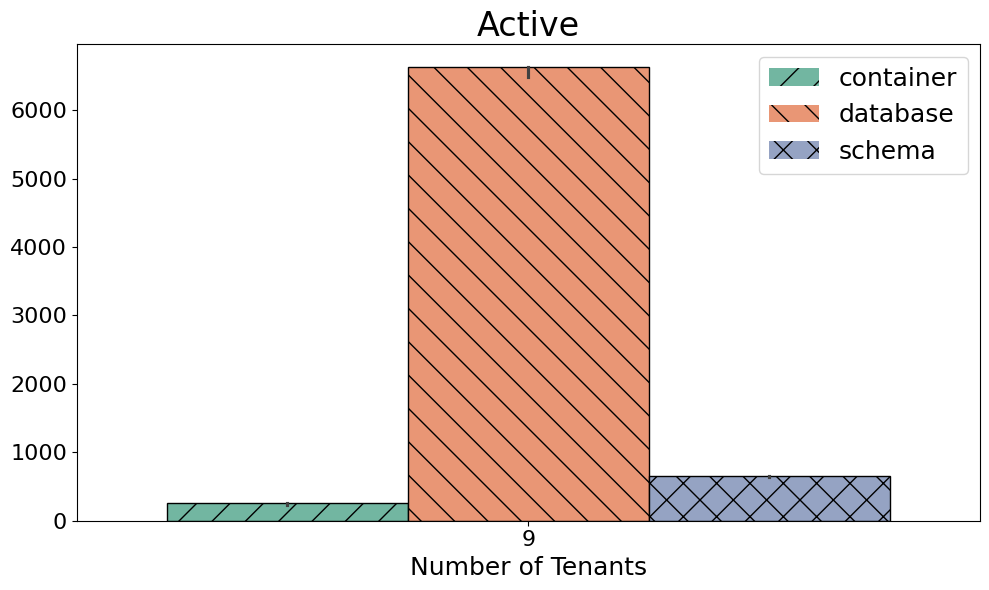

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

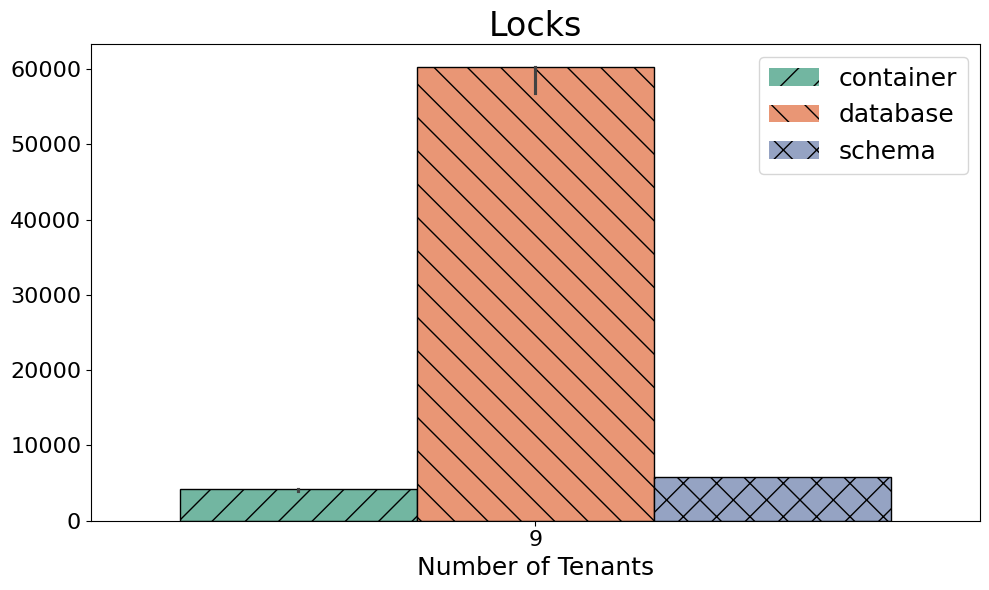

In [21]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

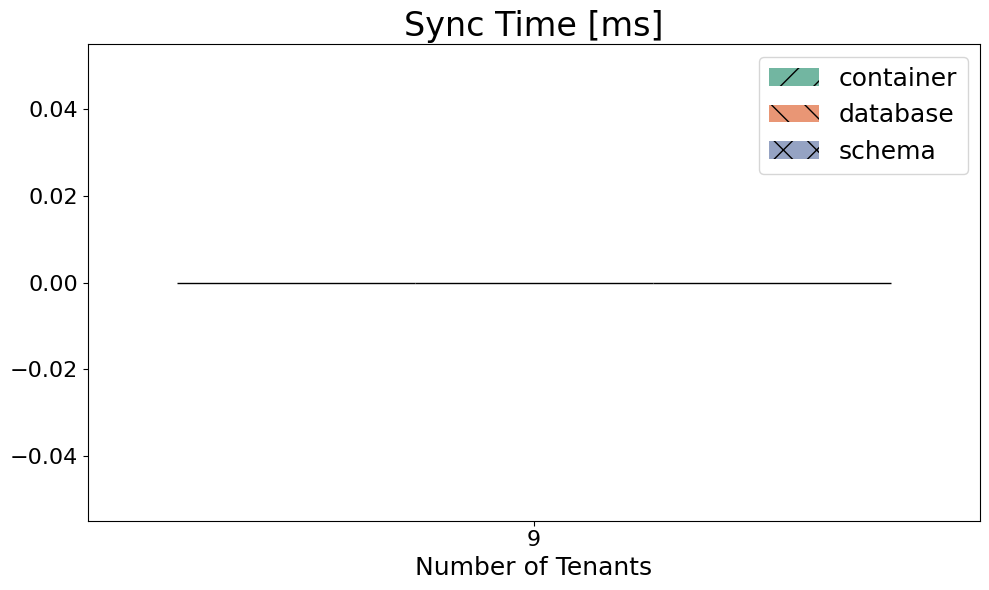

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

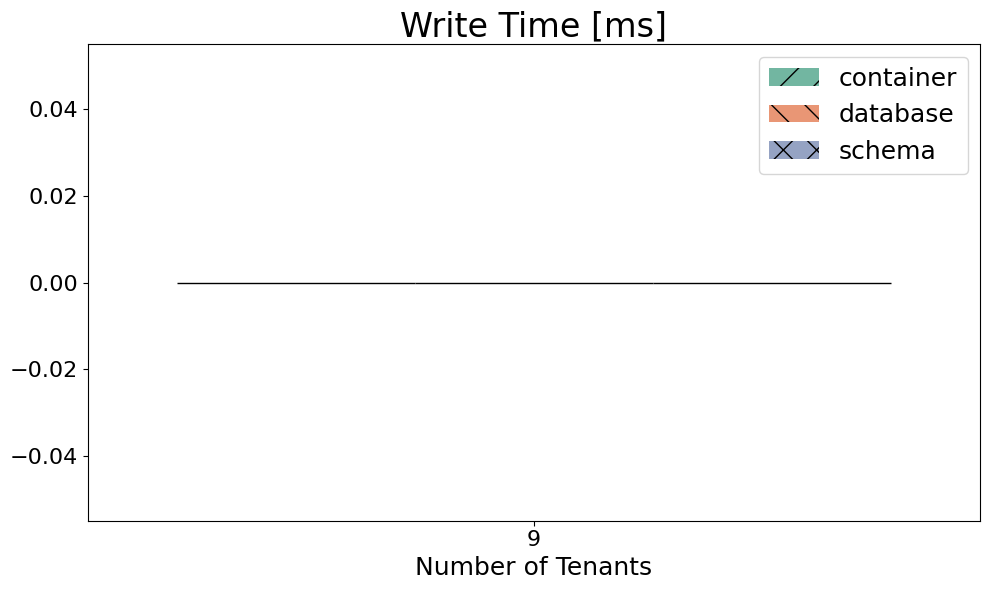

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [24]:
df_performance = get_performance_all_single(codes)
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,ww8ts.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3328700,51456,964,27854,139347,535391,85698,75589,container,9
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,qwgh8.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3987400,45498,788,24121,124830,557923,76484,69799,container,9
PostgreSQL-1-1-65536-2-1-1,PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,1,1,8wxt7.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3577788,54112,847,28997,153145,608151,91018,81770,container,9
PostgreSQL-1-1-65536-3-1-1,PostgreSQL-1-1-65536-3-1,PostgreSQL-1-1-65536-3,1,1,4dgll.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3847885,52986,981,28720,143973,563717,87860,77822,container,9
PostgreSQL-1-1-65536-4-1-1,PostgreSQL-1-1-65536-4-1,PostgreSQL-1-1-65536-4,1,1,sqhls.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,4134646,53166,941,28882,146449,601971,87978,80169,container,9
PostgreSQL-1-1-65536-5-1-1,PostgreSQL-1-1-65536-5-1,PostgreSQL-1-1-65536-5,1,1,4wh6j.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2932431,54036,964,29445,147918,550189,89537,78621,container,9
PostgreSQL-1-1-65536-6-1-1,PostgreSQL-1-1-65536-6-1,PostgreSQL-1-1-65536-6,1,1,4cfhz.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,4980318,52436,934,28747,141928,617669,86302,79759,container,9
PostgreSQL-1-1-65536-7-1-1,PostgreSQL-1-1-65536-7-1,PostgreSQL-1-1-65536-7,1,1,4b9rn.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2508393,52795,827,28604,146466,550937,88101,77587,container,9
PostgreSQL-1-1-65536-8-1-1,PostgreSQL-1-1-65536-8-1,PostgreSQL-1-1-65536-8,1,1,sfhrz.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3414451,51906,879,28486,137548,550766,85003,75762,container,9


## Per Tenant

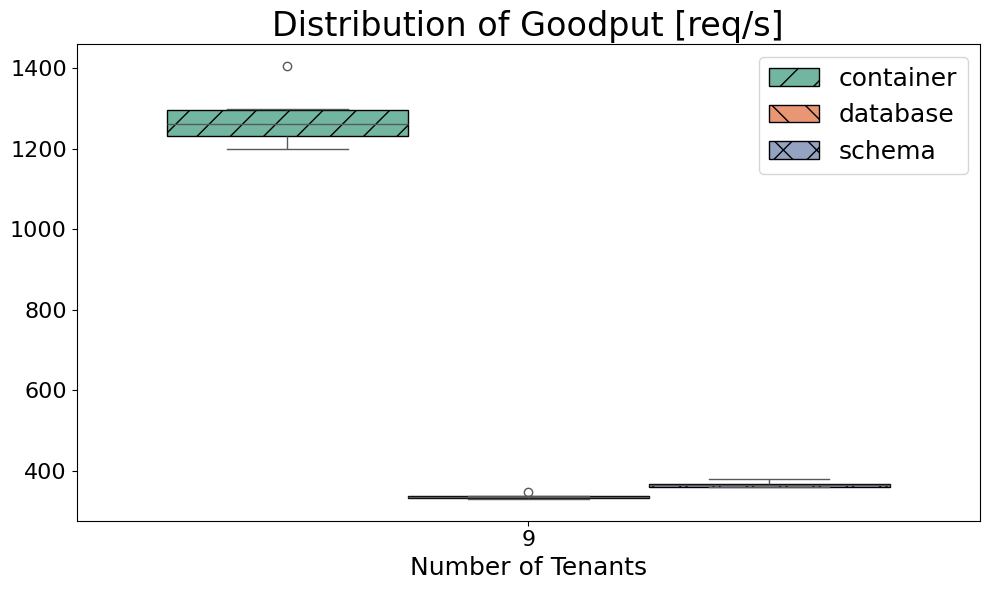

In [25]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

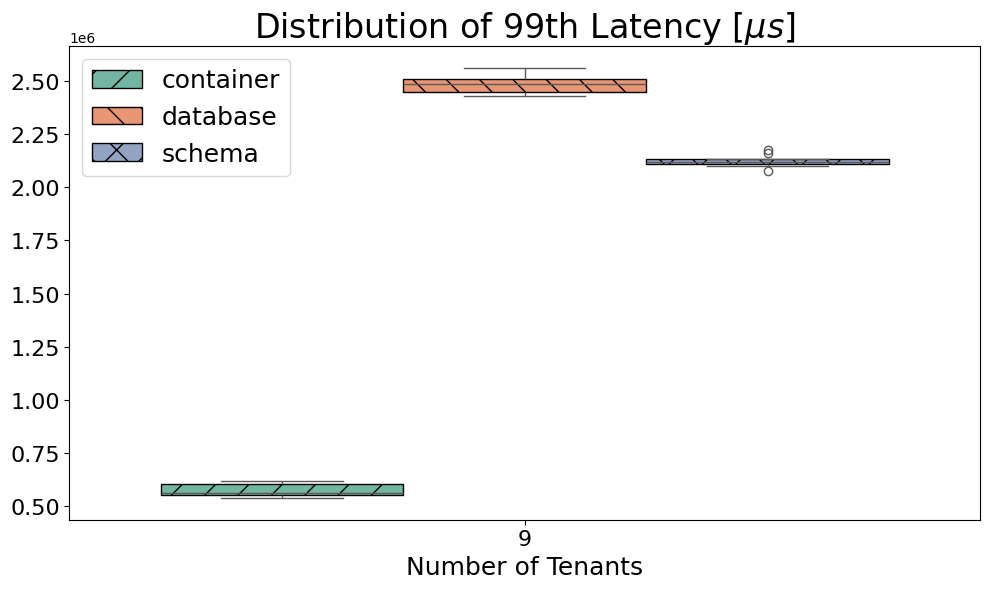

In [26]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [27]:
df_performance = get_performance_all(codes)
df_performance

,client,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants
0,1,11424.515985,347,77430.888889,617669,container,9
1,2,11491.835389,334,77124.000000,630216,container,9
0,1,3016.998256,43,293962.777778,2565191,database,9
1,2,3761.729735,44,235748.222222,1784946,database,9
0,1,3283.688215,47,269810.333333,2175003,schema,9
1,2,3994.928200,59,221842.777778,1604142,schema,9


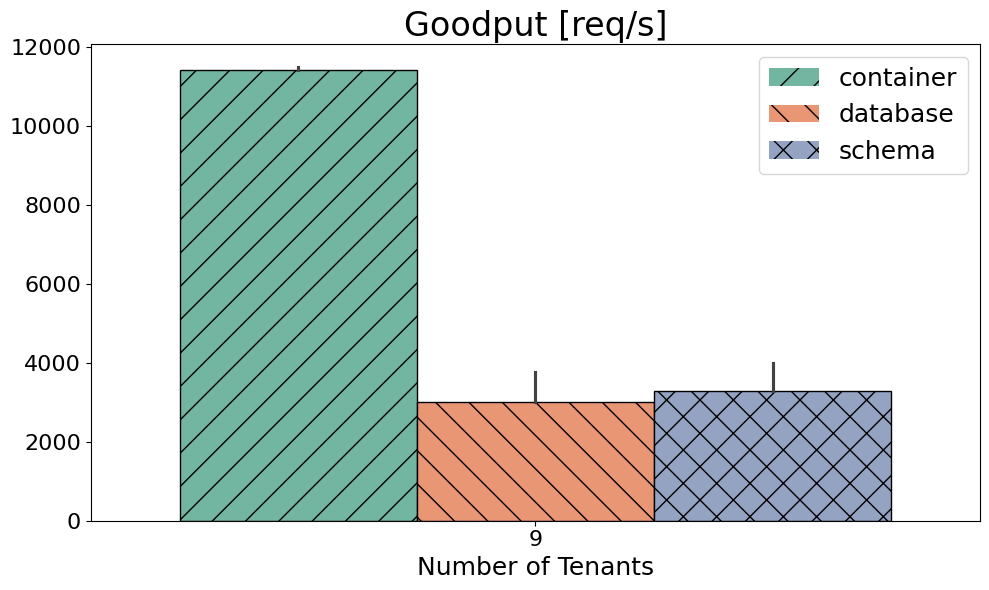

In [28]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

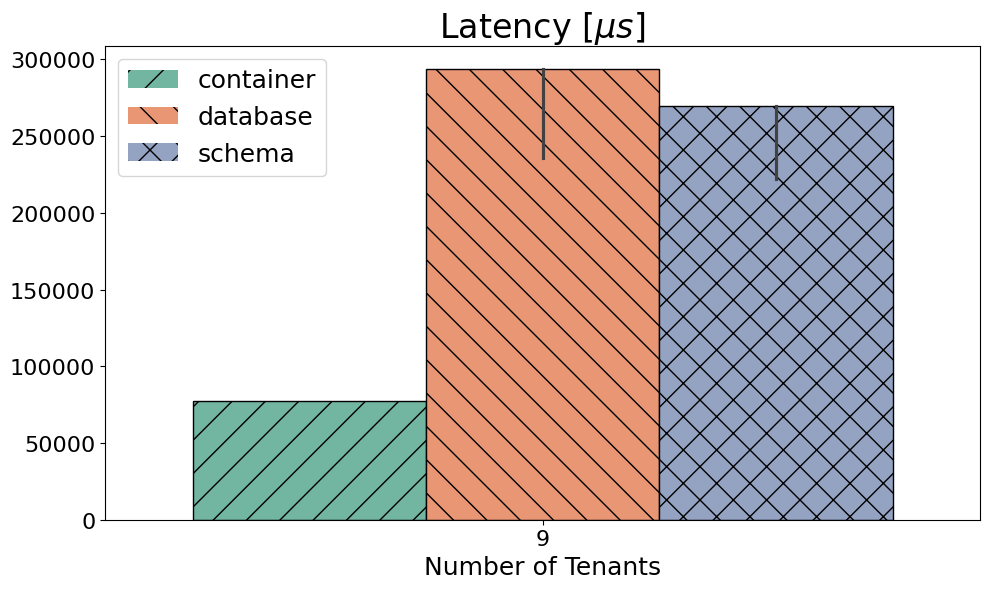

In [29]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

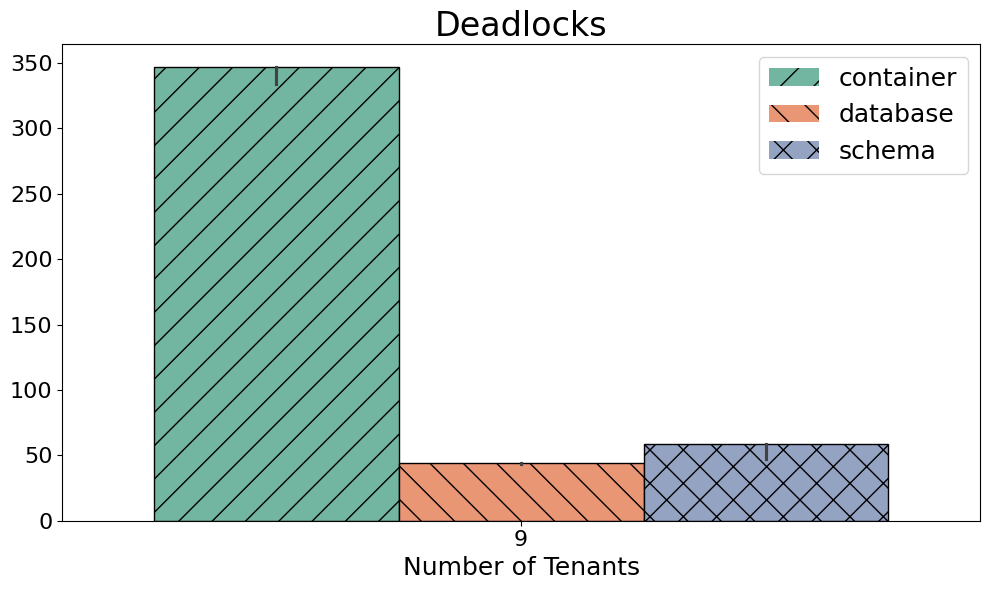

In [30]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [31]:
df_performance = get_loading_time_max_all(codes)
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-0-1,1011.0,164.0,837.0,1,1,0,1,3056,container,9
PostgreSQL-1-1-65536-0-2,1011.0,164.0,837.0,1,1,0,2,3900,container,9
PostgreSQL-1-1-65536-1-1,988.0,156.0,822.0,1,1,1,1,3056,container,9
PostgreSQL-1-1-65536-1-2,988.0,156.0,822.0,1,1,1,2,4004,container,9
PostgreSQL-1-1-65536-2-1,972.0,163.0,801.0,1,1,2,1,3057,container,9
PostgreSQL-1-1-65536-2-2,972.0,163.0,801.0,1,1,2,2,3844,container,9
PostgreSQL-1-1-65536-3-1,942.0,152.0,780.0,1,1,3,1,3056,container,9
PostgreSQL-1-1-65536-3-2,942.0,152.0,780.0,1,1,3,2,3922,container,9
PostgreSQL-1-1-65536-4-1,923.0,157.0,758.0,1,1,4,1,3057,container,9
PostgreSQL-1-1-65536-4-2,923.0,157.0,758.0,1,1,4,2,3875,container,9


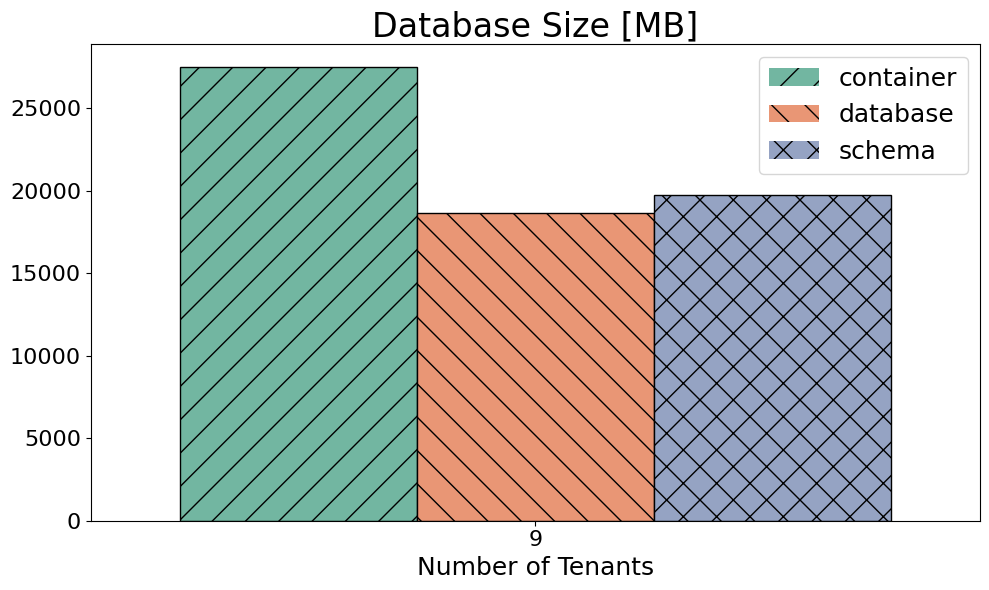

In [32]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

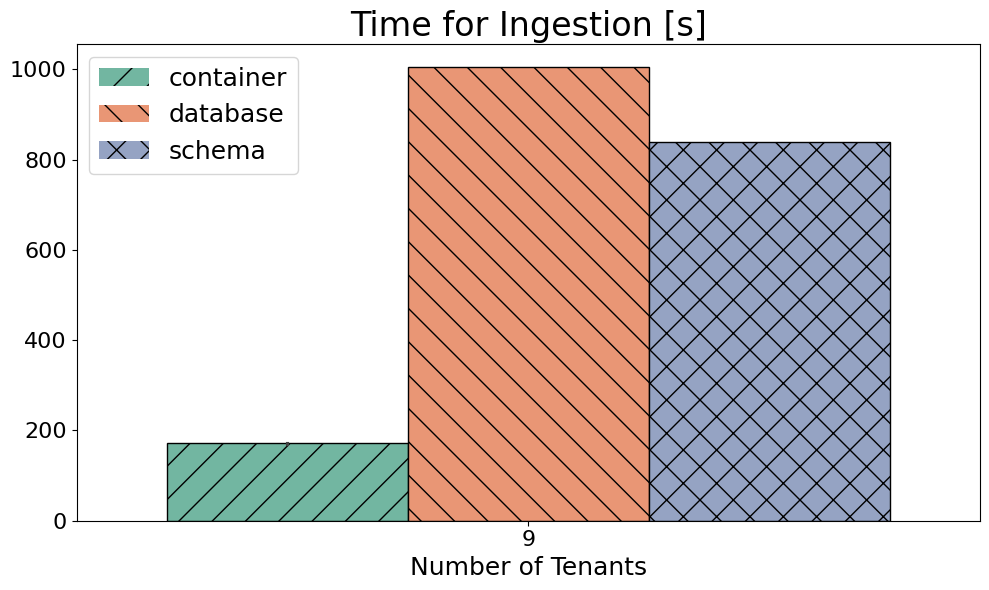

In [33]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

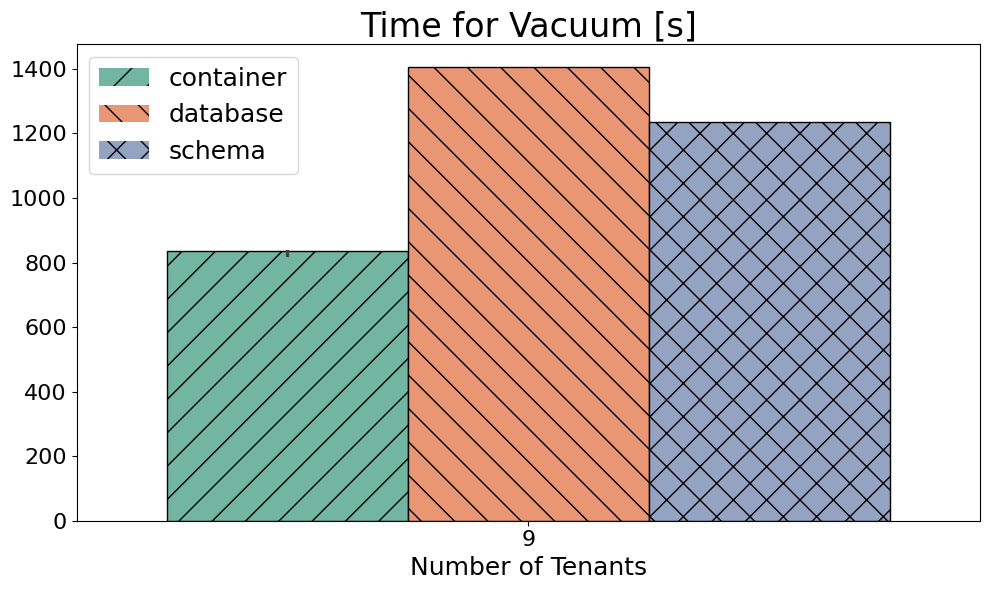

In [34]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [35]:
df_performance = get_monitoring_stream_all(codes)
df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,35478.10,73.48,109.63,60.60,3902.65,228.05,10.78,143.81,0.0,...,288.0,131.0,1.049215e+09,0.0,0.0,109100.0,88200.0,100.0,container,9
0,1,10325.02,29.98,51.50,30.58,60256.40,6631.10,26.71,387.52,0.0,...,530.0,53.0,2.204529e+08,0.0,0.0,83900.0,70900.0,100.0,database,9
0,1,10979.05,30.17,51.74,26.55,5776.45,654.64,1.38,35.37,0.0,...,98.0,84.0,2.502046e+08,0.0,0.0,75800.0,66100.0,100.0,schema,9


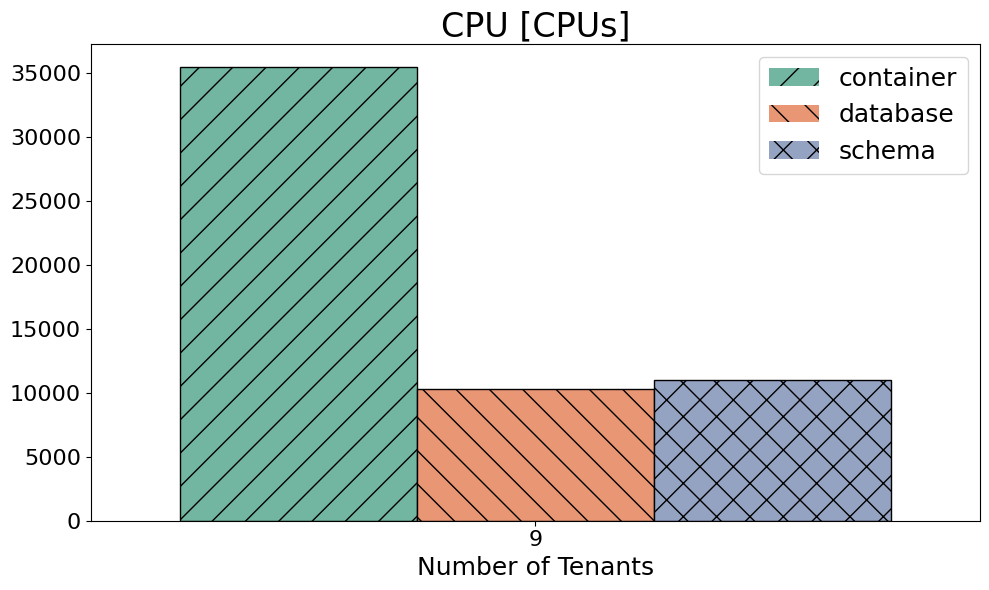

In [36]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

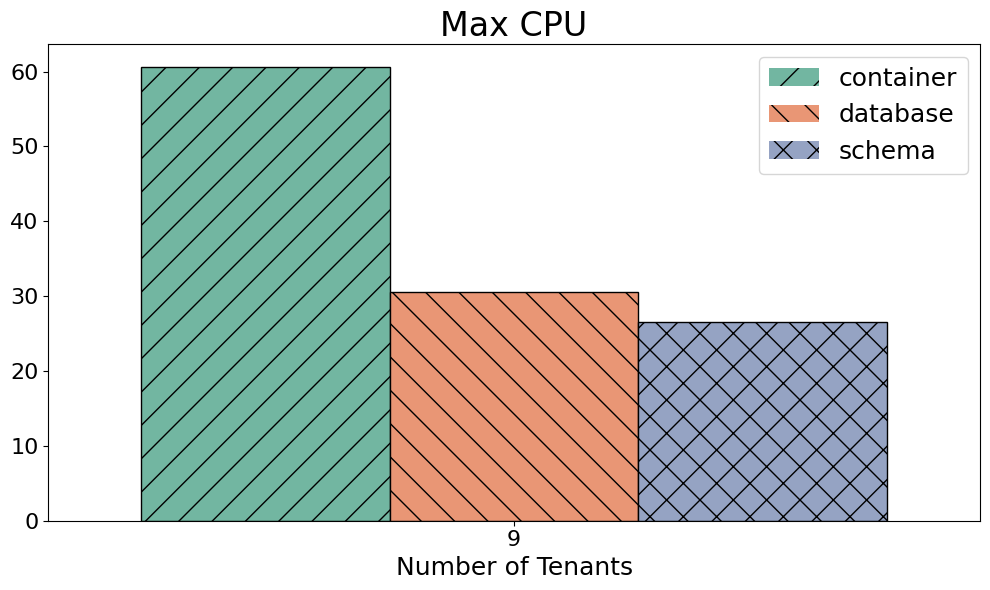

In [37]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

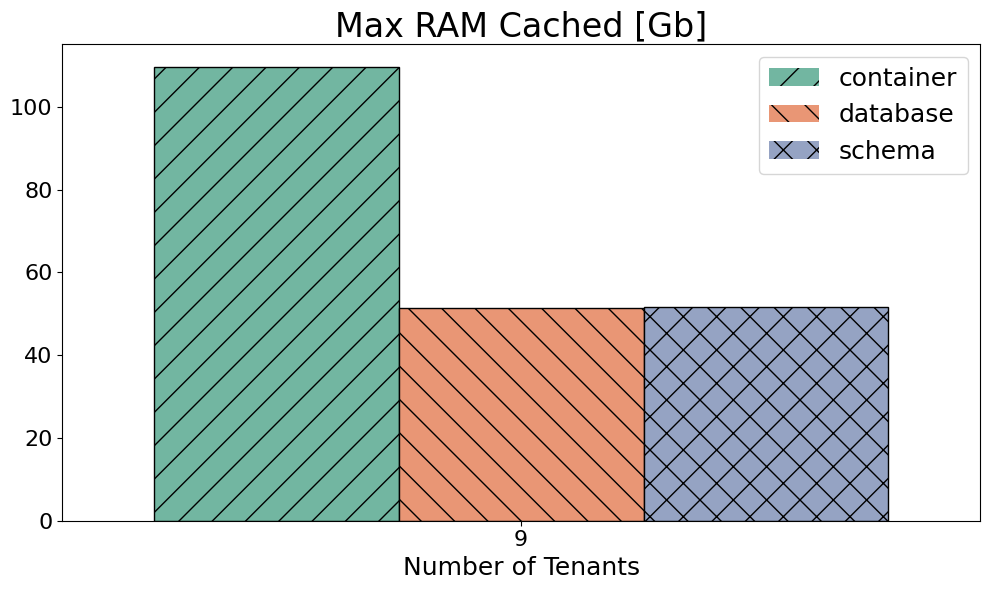

In [38]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [39]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,...,Block Reads,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],type,num_tenants
0,1,35478.10,73.48,109.63,60.60,3902.65,228.05,10.78,143.81,0.0,...,288.0,131.0,1.049215e+09,0.0,0.0,109100.0,88200.0,100.0,container,9
1,2,35482.21,80.35,123.16,62.54,4187.24,255.91,11.54,149.48,0.0,...,74.0,74.0,9.960372e+08,0.0,0.0,100700.0,81000.0,100.0,container,9
0,1,10325.02,29.98,51.50,30.58,60256.40,6631.10,26.71,387.52,0.0,...,530.0,53.0,2.204529e+08,0.0,0.0,83900.0,70900.0,100.0,database,9
1,2,12667.68,34.37,58.27,28.71,56785.56,6478.18,21.51,348.12,0.0,...,240.0,24.0,2.674580e+08,0.0,0.0,78600.0,63200.0,100.0,database,9
0,1,10979.05,30.17,51.74,26.55,5776.45,654.64,1.38,35.37,0.0,...,98.0,84.0,2.502046e+08,0.0,0.0,75800.0,66100.0,100.0,schema,9
1,2,13270.70,37.07,63.64,32.33,5773.48,641.85,7.61,47.04,1.0,...,27.0,27.0,3.130845e+08,0.0,0.0,67000.0,58700.0,100.0,schema,9


In [40]:
#plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

In [41]:
#plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

In [42]:
#plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [43]:
client = '1'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,1,11424.515985,347,77430.888889,617669,container,9,1,35478.10,73.48,...,131.0,1.049215e+09,0.0,0.0,109100.0,88200.0,100.0,193.209602,0.019079,155.477899
1,1,3016.998256,43,293962.777778,2565191,database,9,1,10325.02,29.98,...,53.0,2.204529e+08,0.0,0.0,83900.0,70900.0,100.0,175.321593,0.018151,100.633698
2,1,3283.688215,47,269810.333333,2175003,schema,9,1,10979.05,30.17,...,84.0,2.502046e+08,0.0,0.0,75800.0,66100.0,100.0,179.452041,0.018373,108.839517


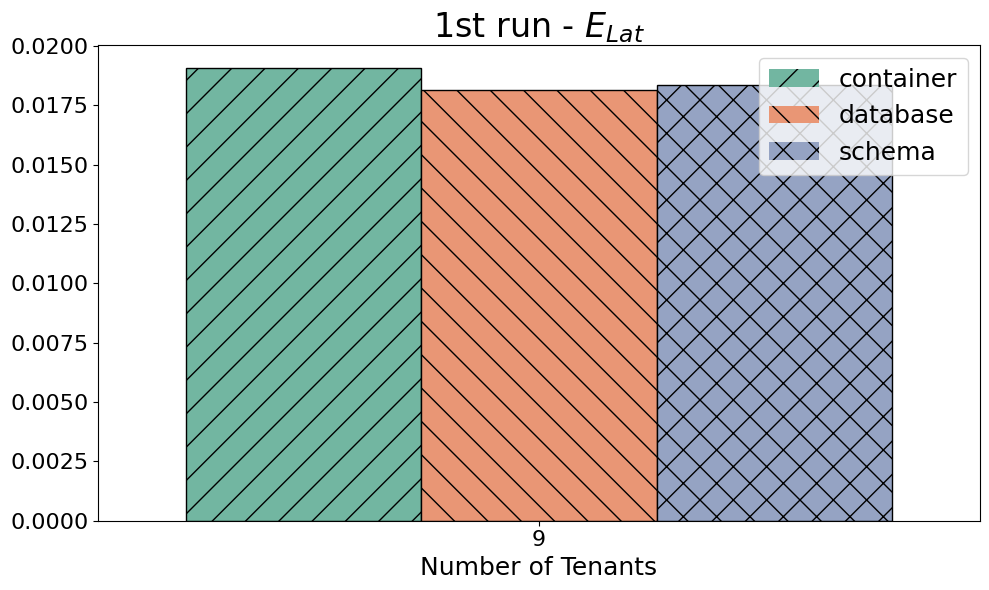

In [44]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [45]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

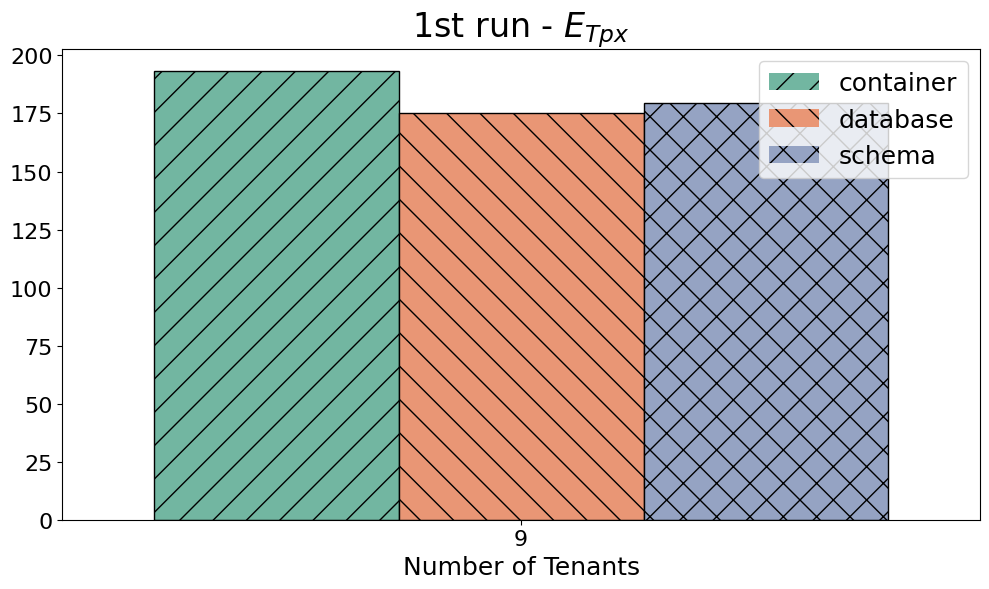

In [46]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

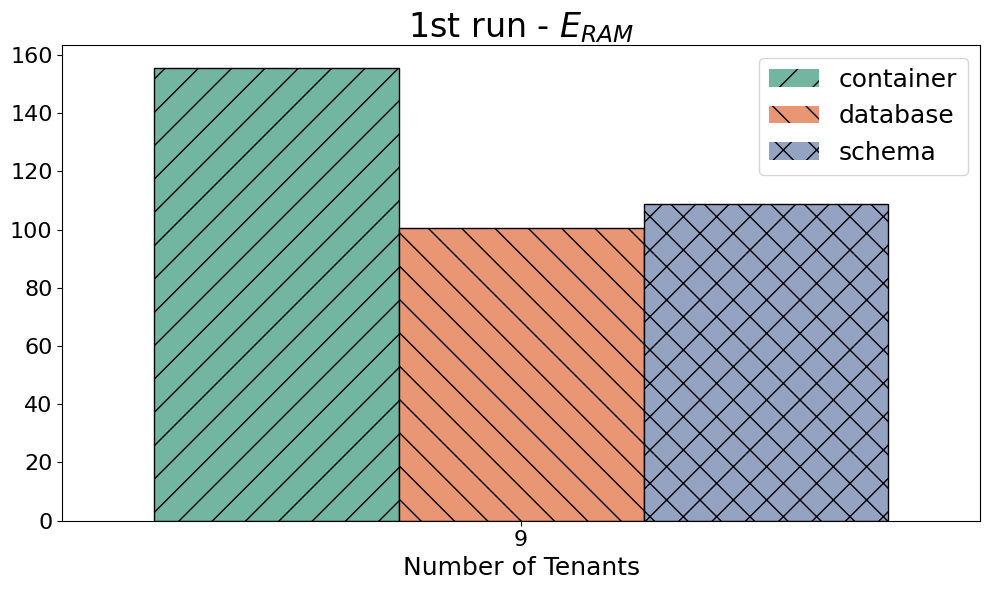

In [47]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [48]:
client = '2'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,2,11491.835389,334,77124.000000,630216,container,9,2,35482.21,80.35,...,74.0,996037219.0,0.0,0.0,100700.0,81000.0,100.0,194.325586,0.019116,143.022220
1,2,3761.729735,44,235748.222222,1784946,database,9,2,12667.68,34.37,...,24.0,267458034.0,0.0,0.0,78600.0,63200.0,100.0,178.172944,0.018299,109.448057
2,2,3994.928200,59,221842.777778,1604142,schema,9,2,13270.70,37.07,...,27.0,313084506.0,0.0,0.0,67000.0,58700.0,100.0,180.620233,0.018430,107.767149


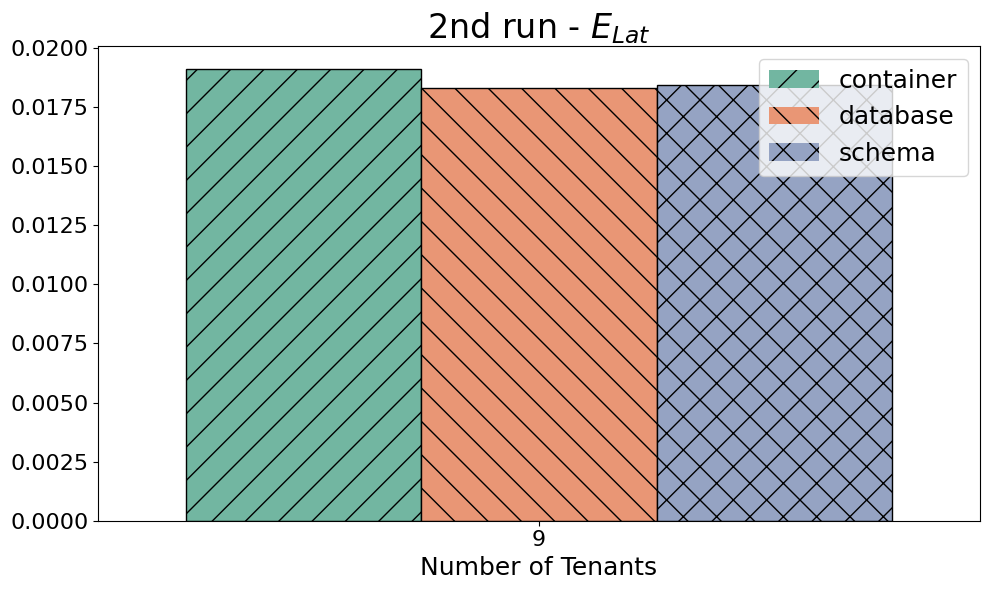

In [49]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

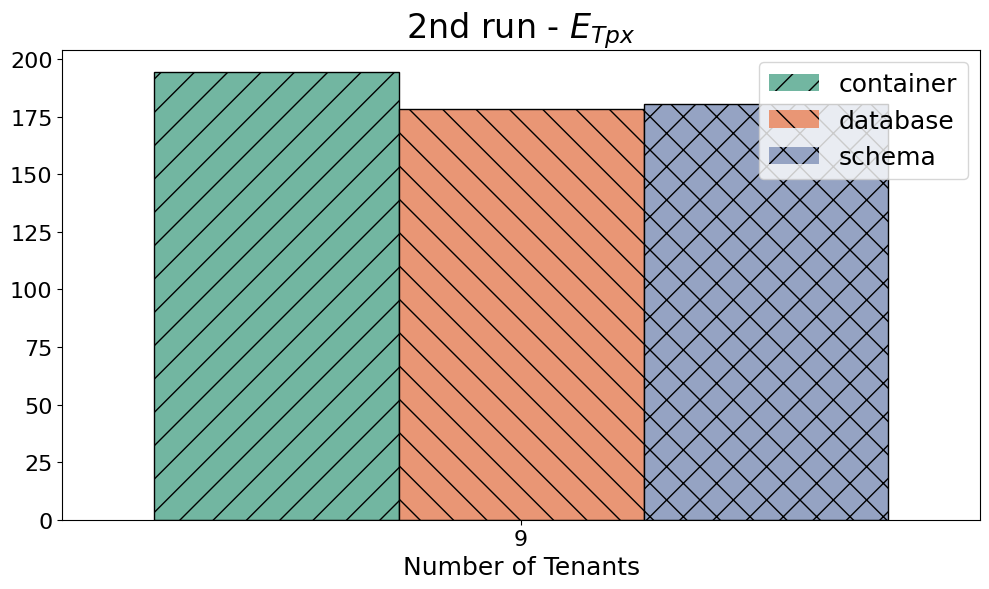

In [50]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

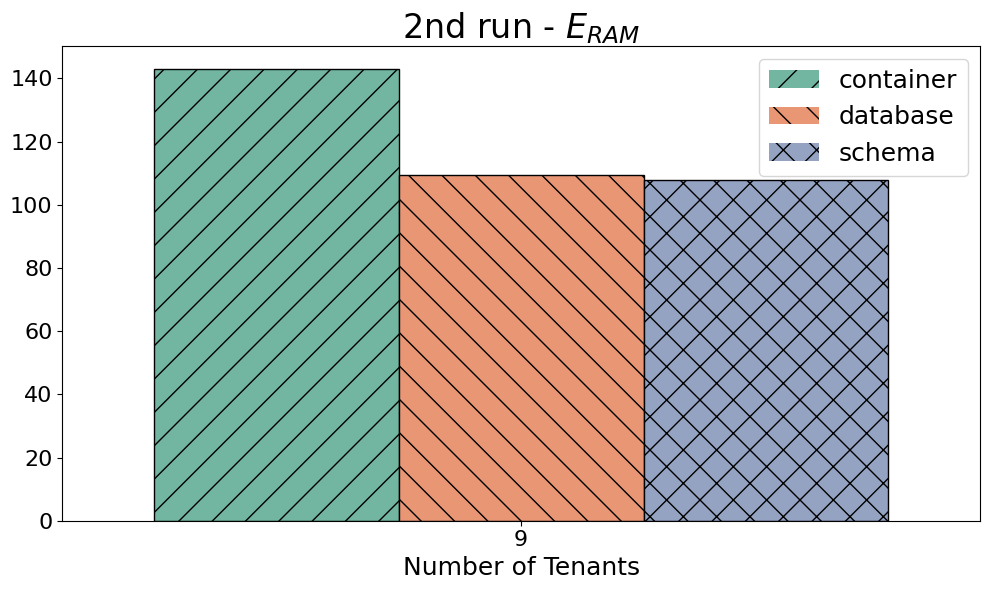

In [51]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [52]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [53]:
zip_all_results()

Zipping C:\data\benchmarks\1752572699 to C:\data\benchmarks\1752572699.zip...
Zipping C:\data\benchmarks\1752568918 to C:\data\benchmarks\1752568918.zip...
Zipping C:\data\benchmarks\1752565302 to C:\data\benchmarks\1752565302.zip...
✅ Done zipping all folders.
